In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [14]:
df = pd.read_csv("ahmedabadHousing.csv")
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       5839 non-null   float64
 1   price_sqft  5839 non-null   int64  
 2   bhk         5839 non-null   int64  
 3   location    5839 non-null   object 
 4   total_sqft  5839 non-null   int64  
 5   floor_num   5839 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 273.8+ KB


price         0
price_sqft    0
bhk           0
location      0
total_sqft    0
floor_num     0
dtype: int64

In [15]:
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)    

df = pd.get_dummies(df, drop_first=True)    

C:\Users\DELL\AppData\Local\Temp\ipykernel_10552\3603929359.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10552\3603929359.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [16]:
X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [19]:
print("MSE:", mse)
print("R2:", r2)

MSE: 529.3482314587375
R2: 0.34832681682915556


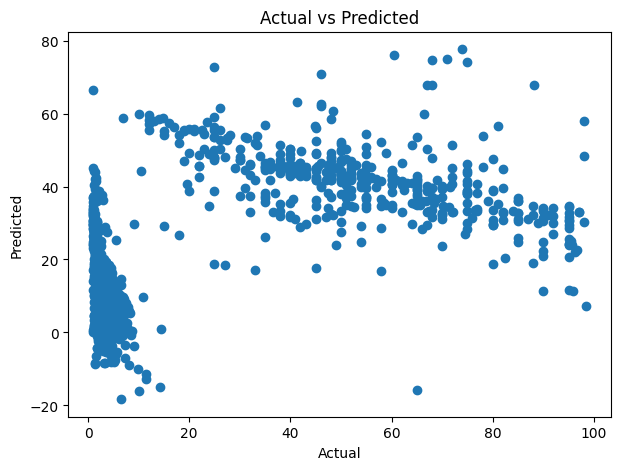

['house_price_model.pkl']

In [20]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()
joblib.dump(model, "house_price_model.pkl")
